In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 2000
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/benchmark/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=2000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 12|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 25|reward:  139.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1

  Episode 1 ended at t=594 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/238 (0.08)
    explore-remote: 19/306 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 64
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8539, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|It

  Episode 2 ended at t=693 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/275 (0.07)
    explore-remote: 20/366 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 113
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8035, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 ended at t=680 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/267 (0.07)
    explore-remote: 20/361 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 118
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7572, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Iteration 16|reward:  140.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Ite

  Episode 4 ended at t=423 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/151 (0.12)
    explore-remote: 20/221 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 91
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7300, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iter

  Episode 5 ended at t=1050 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/476 (0.04)
    explore-remote: 20/522 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 306
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6672, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|Iteration 17|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|Ite

  Episode 6 ended at t=714 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/270 (0.07)
    explore-remote: 20/392 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 221
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6281, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 7|Iter

  Episode 7 ended at t=763 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/317 (0.06)
    explore-remote: 18/398 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 281
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.5893, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 16|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 16|reward:  127.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 8|Iteration 19|reward:  133.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 8|Iteration 19|reward:  133.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 8|It

  Episode 8 ended at t=695 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/281 (0.07)
    explore-remote: 20/362 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 300
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5565, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 11|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 9|Iteration 23|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 9|Iteration 32|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 9|It

  Episode 9 ended at t=791 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/285 (0.07)
    explore-remote: 20/455 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 331
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5217, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 13|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 13|reward:  114.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:  116.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:  116.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:  118.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 26|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 27|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00

  Episode 10 ended at t=544 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/211 (0.09)
    explore-remote: 17/285 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 244
simulation ended


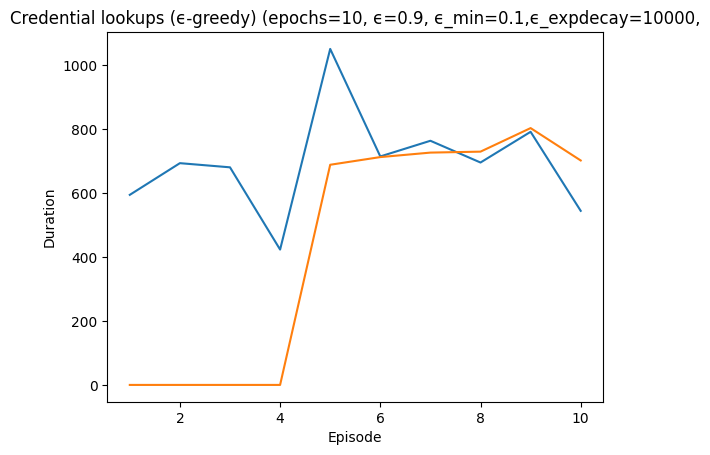

In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [9]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=2000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 1|It

  Episode 1 ended at t=1437 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/348 (0.05)
    explore-remote: 19/447 (0.04)
    explore-connect: 0/475 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 1/104 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 196
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6778, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 15|reward:  135.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 2|Iteration 15|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 2|Iter

  Episode 2 ended at t=1172 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/228 (0.07)
    explore-remote: 19/326 (0.06)
    explore-connect: 0/342 (0.00)
    exploit-local: 2/10 (0.17)
    exploit-remote: 1/215 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 220
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.5383, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Itera

  Episode 3 ended at t=301 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/61 (0.15)
    explore-remote: 16/68 (0.19)
    explore-connect: 0/86 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 2/39 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 92
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.5074, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iterat

  Episode 4 ended at t=313 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/66 (0.14)
    explore-remote: 17/74 (0.19)
    explore-connect: 0/110 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 2/13 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 137
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.4772, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  135.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:  135.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=688 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/142 (0.09)
    explore-remote: 17/172 (0.09)
    explore-connect: 0/194 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/132 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 236
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.4172, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iterat

  Episode 6 ended at t=810 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/178 (0.09)
    explore-remote: 18/204 (0.08)
    explore-connect: 0/248 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 2/128 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 353
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.3563, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 7|Iteration 13|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 7|Ite

  Episode 7 ended at t=547 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/131 (0.09)
    explore-remote: 18/166 (0.10)
    explore-connect: 0/202 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 361
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.3204, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iterat

  Episode 8 ended at t=239 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/43 (0.17)
    explore-remote: 15/70 (0.18)
    explore-connect: 0/84 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 140
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.3059, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iterat

  Episode 9 ended at t=813 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/189 (0.06)
    explore-remote: 19/245 (0.07)
    explore-connect: 0/267 (0.00)
    exploit-local: 6/30 (0.17)
    exploit-remote: 0/33 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 500
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.2615, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 10 ended at t=916 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/238 (0.06)
    explore-remote: 20/298 (0.06)
    explore-connect: 0/289 (0.00)
    exploit-local: 5/19 (0.21)
    exploit-remote: 0/20 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 644
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.2194, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 11 ended at t=1283 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/266 (0.06)
    explore-remote: 18/305 (0.06)
    explore-connect: 0/362 (0.00)
    exploit-local: 4/22 (0.15)
    exploit-remote: 2/276 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 717
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.1720, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 12 ended at t=249 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/48 (0.19)
    explore-remote: 18/59 (0.23)
    explore-connect: 0/86 (0.00)
    exploit-local: 9/7 (0.56)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 192
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.1641, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 6|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epi

  Episode 13 ended at t=217 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/37 (0.21)
    explore-remote: 18/43 (0.30)
    explore-connect: 0/74 (0.00)
    exploit-local: 7/17 (0.29)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 148
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.1576, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 13|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 13|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 14|Iteration 14|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||
E

  Episode 14 ended at t=751 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/213 (0.08)
    explore-remote: 20/236 (0.08)
    explore-connect: 0/239 (0.00)
    exploit-local: 3/2 (0.60)
    exploit-remote: 0/9 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 607
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.1370, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 15 ended at t=449 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/98 (0.12)
    explore-remote: 18/104 (0.15)
    explore-connect: 0/145 (0.00)
    exploit-local: 6/7 (0.46)
    exploit-remote: 1/45 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 315
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.1261, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 16 ended at t=239 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/59 (0.17)
    explore-remote: 15/49 (0.23)
    explore-connect: 0/65 (0.00)
    exploit-local: 7/10 (0.41)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 170
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.1207, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 6|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 17 ended at t=547 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/117 (0.09)
    explore-remote: 16/161 (0.09)
    explore-connect: 0/161 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 1/62 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 411
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.1092, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 18|Iteration 8|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 18 ended at t=277 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/75 (0.15)
    explore-remote: 16/68 (0.19)
    explore-connect: 0/77 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 221
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.1039, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 9|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 19 ended at t=343 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/66 (0.13)
    explore-remote: 18/105 (0.15)
    explore-connect: 0/115 (0.00)
    exploit-local: 8/10 (0.44)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 280
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0976, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 20 ended at t=236 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/53 (0.18)
    explore-remote: 17/55 (0.24)
    explore-connect: 0/81 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 197
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=3,iteration_count=2000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=301 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/46 (0.13)
    explore-remote: 10/28 (0.26)
    explore-connect: 0/62 (0.00)
    exploit-local: 10/102 (0.09)
    exploit-remote: 9/16 (0.36)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 153
  ## Episode: 2/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=455 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/54 (0.13)
    explore-remote: 15/68 (0.18)
    explore-connect: 0/78 (0.00)
    exploit-local: 12/134 (0.08)
    exploit-remote: 5/70 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 223
  ## Episode: 3/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=907 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/105 (0.08)
    explore-remote: 15/167 (0.08)
    explore-connect: 0/154 (0.00)
    exploit-local: 12/255 (0.04)
    exploit-remote: 5/174 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 450
simulation ended


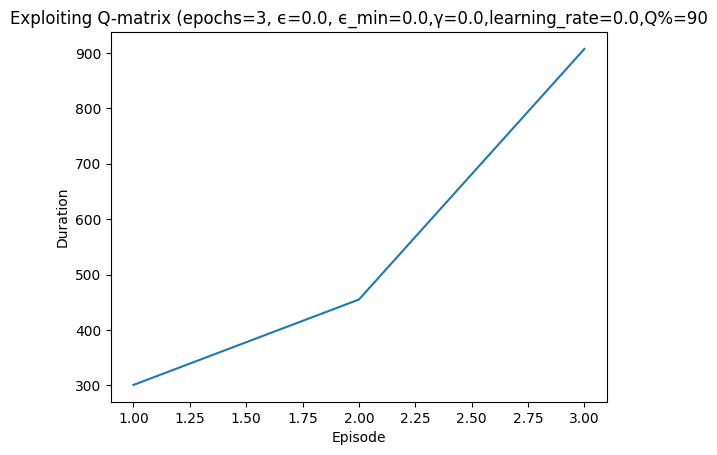

In [10]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [11]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=2000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
/Users/phurwasherpa/Downloads/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 17|reward:   20.0|last_reward_at:   1

  Episode 1 ended at t=635 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/144 (0.05)
    explore-remote: 18/193 (0.09)
    explore-connect: 3/202 (0.01)
    exploit-local: 10/41 (0.20)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 8/6 (0.57)
  exploit deflected to exploration: 21
  ## Episode: 2/20 'DQL' ϵ=0.8047, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=152 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/26 (0.13)
    explore-remote: 16/34 (0.32)
    explore-connect: 0/43 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 3/20 'DQL' ϵ=0.7836, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|Iteration 17|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|I

  Episode 3 ended at t=167 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/24 (0.08)
    explore-remote: 10/39 (0.20)
    explore-connect: 0/43 (0.00)
    exploit-local: 12/9 (0.57)
    exploit-remote: 3/13 (0.19)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 4/20 'DQL' ϵ=0.7612, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 18|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 22|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 26|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 30|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 ended at t=118 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 12/32 (0.27)
    explore-connect: 1/35 (0.03)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 10/2 (0.83)
  exploit deflected to exploration: 3
  ## Episode: 5/20 'DQL' ϵ=0.7457, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iterat

  Episode 5 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/5 (0.44)
    explore-remote: 10/6 (0.62)
    explore-connect: 0/15 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/20 'DQL' ϵ=0.7380, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 13|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 6|Iter

  Episode 6 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/7 (0.36)
    explore-remote: 9/10 (0.47)
    explore-connect: 1/22 (0.04)
    exploit-local: 10/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/20 'DQL' ϵ=0.7287, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iterat

  Episode 7 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/11 (0.35)
    explore-remote: 8/10 (0.44)
    explore-connect: 0/14 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/20 'DQL' ϵ=0.7202, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iterat

  Episode 8 ended at t=77 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 9/15 (0.38)
    explore-connect: 0/16 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'DQL' ϵ=0.7107, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 9|Iteration 12|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 9|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 9|It

  Episode 9 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/17 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/20 'DQL' ϵ=0.7031, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:  133.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 10 ended at t=112 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/21 (0.19)
    explore-remote: 12/30 (0.29)
    explore-connect: 0/20 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 11/20 'DQL' ϵ=0.6897, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 8|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 12|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 12|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 11|Iteration 17|reward:  144.0|last_reward_at:   12|Elapsed Time: 0:00:00||

  Episode 11 ended at t=1113 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/176 (0.06)
    explore-remote: 18/252 (0.07)
    explore-connect: 0/255 (0.00)
    exploit-local: 7/143 (0.05)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 11/228 (0.05)
  exploit deflected to exploration: 6
  ## Episode: 12/20 'DQL' ϵ=0.5720, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 8|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 12|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 12|Iteration 13|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 12|Iteration 17|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 12|Iteration 17|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||
E

  Episode 12 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 11/7 (0.61)
    explore-connect: 0/18 (0.00)
    exploit-local: 10/4 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 13/20 'DQL' ϵ=0.5649, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epis

  Episode 13 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/5 (0.69)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/20 'DQL' ϵ=0.5602, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 14|Iteration 11|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 14|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 14|Iteration 14|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 14|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||


  Episode 14 ended at t=60 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 3/7 (0.30)
    explore-connect: 0/14 (0.00)
    exploit-local: 9/4 (0.69)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'DQL' ϵ=0.5547, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 9|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 15|Iteration 13|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 15|Iteration 18|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 15|Iteration 19|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||
E

  Episode 15 ended at t=150 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 10/14 (0.42)
    explore-connect: 0/30 (0.00)
    exploit-local: 10/28 (0.26)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/31 (0.26)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'DQL' ϵ=0.5413, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 7|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 16|Iteration 9|reward:  240.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 16 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/286 (0.03)
    explore-remote: 20/302 (0.06)
    explore-connect: 0/318 (0.00)
    exploit-local: 8/342 (0.02)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 9/705 (0.01)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'DQL' ϵ=0.3958, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Ep

  Episode 17 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/4 (0.73)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'DQL' ϵ=0.3936, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 18|Iteration 7|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

  Episode 18 ended at t=1525 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/159 (0.05)
    explore-remote: 20/188 (0.10)
    explore-connect: 0/216 (0.00)
    exploit-local: 12/274 (0.04)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 11/632 (0.02)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'DQL' ϵ=0.3164, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 7|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 19 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/167 (0.04)
    explore-remote: 16/192 (0.08)
    explore-connect: 2/187 (0.01)
    exploit-local: 8/108 (0.07)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/1307 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'DQL' ϵ=0.2451, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 20|Iteration 11|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epi

  Episode 20 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/125 (0.05)
    explore-remote: 10/169 (0.06)
    explore-connect: 1/145 (0.01)
    exploit-local: 9/796 (0.01)
    exploit-remote: 4/59 (0.06)
    exploit-connect: 7/669 (0.01)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=3,iteration_count=2000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/2 (0.85)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 2|Iterat

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iterat

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [13]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=3,iteration_count=2000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/3 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   14.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 23|reward:   18.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 23|reward:   18.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 1|Iteration 25|reward:   20.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 1|Iteration 25|reward:   20.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 1|Iteration 33|reward:  120.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 1|Iteration 33|reward:  120.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 1|Iteration 46|reward:  120.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episod

  Episode 1 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/505 (0.02)
    explore-remote: 10/753 (0.01)
    explore-connect: 5/718 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:   18.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|Iteration 26|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|Iteration 34|reward:   20.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|Iteration 34|reward:   20.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 2|Iteration 46|reward:   20.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 2|Iteration 58|reward:   20.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episod

  Episode 2 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/522 (0.02)
    explore-remote: 10/706 (0.01)
    explore-connect: 4/749 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 16|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 3|Iteration 21|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 3|Iteration 21|reward:  120.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 3|Iteration 27|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 3|Iteration 27|reward:  131.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 

  Episode 3 stopped at t=2000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/492 (0.02)
    explore-remote: 12/765 (0.02)
    explore-connect: 5/715 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


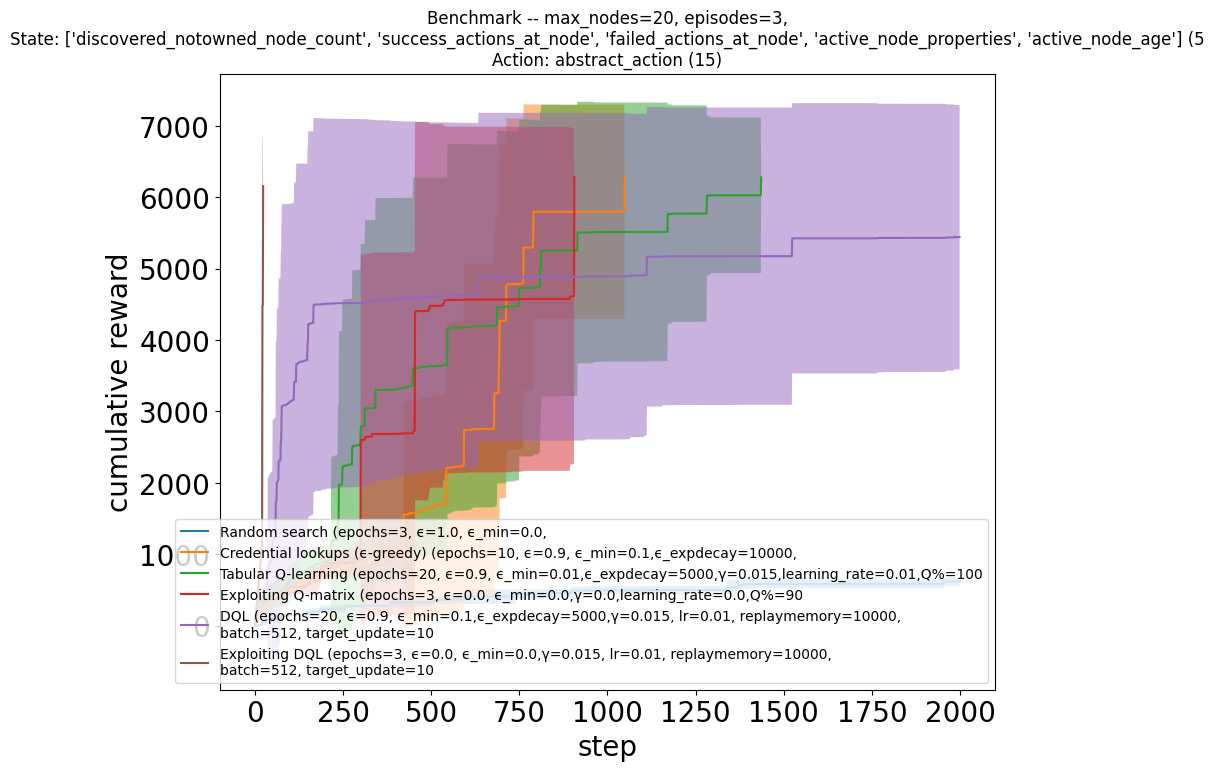

In [14]:
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

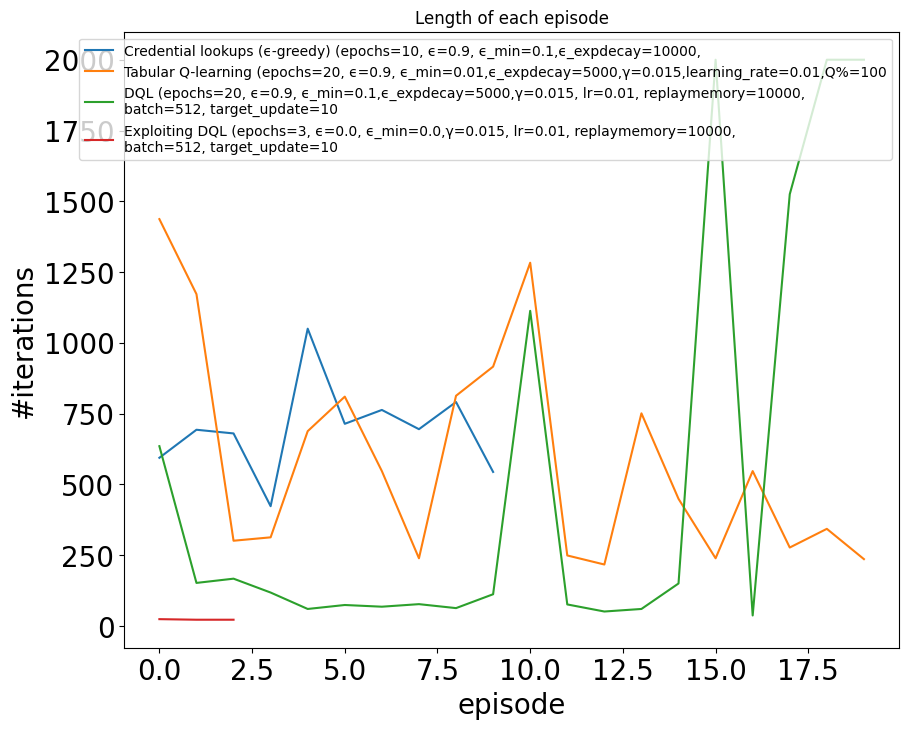

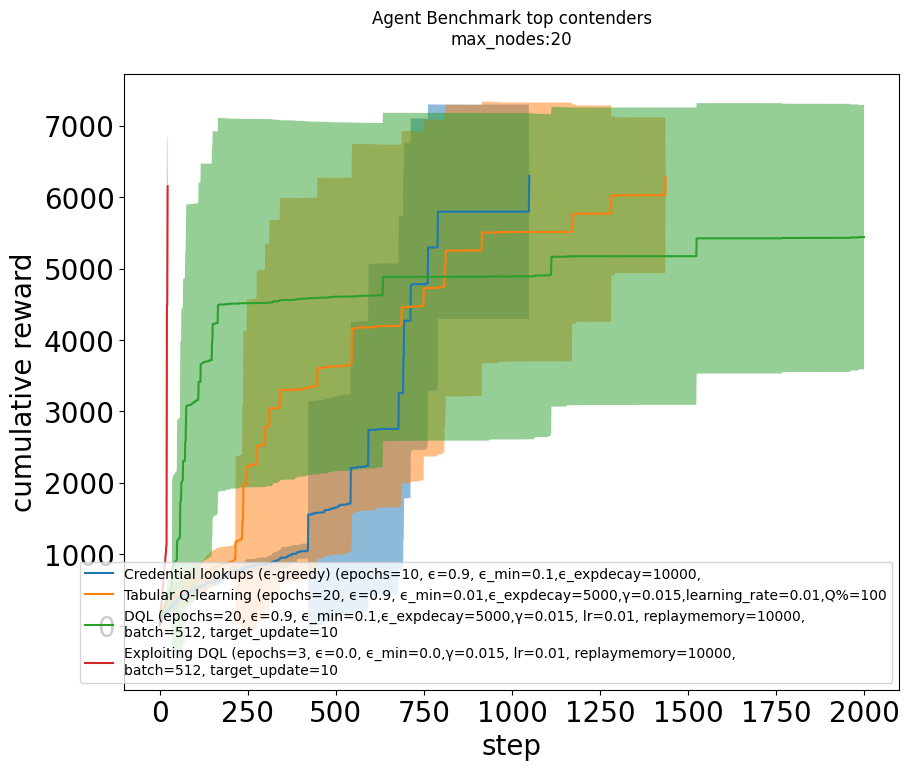

In [15]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                                    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"))

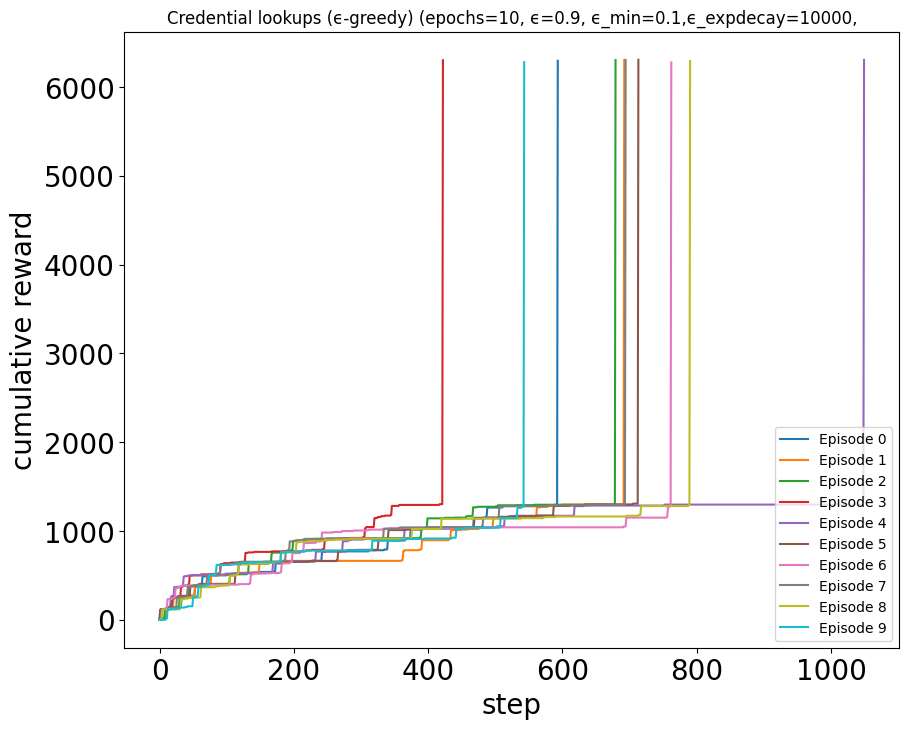

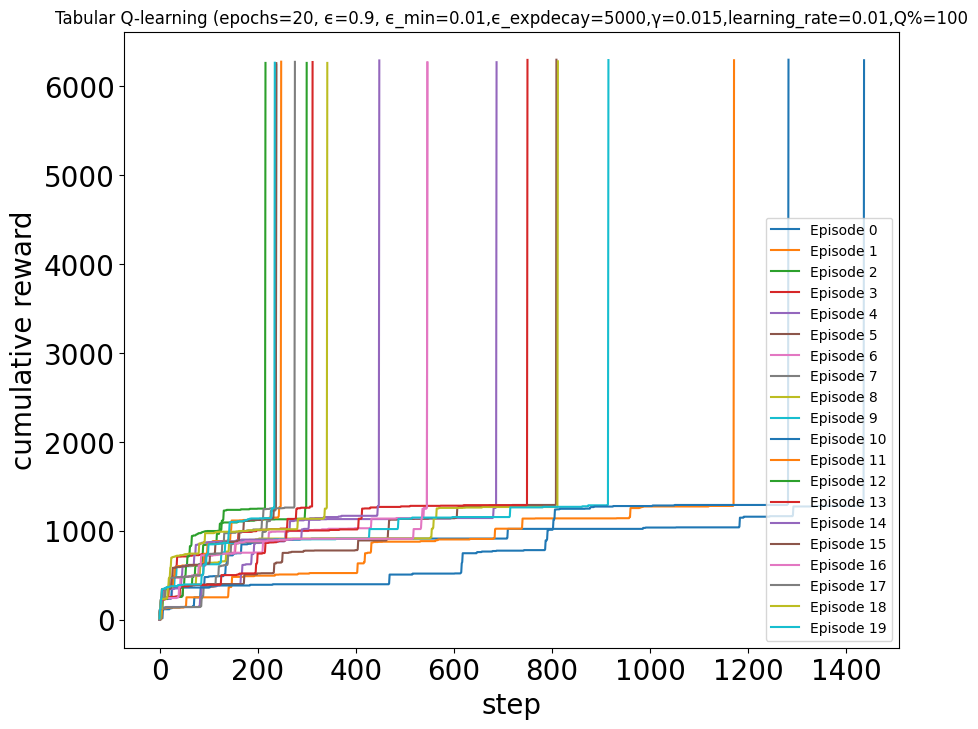

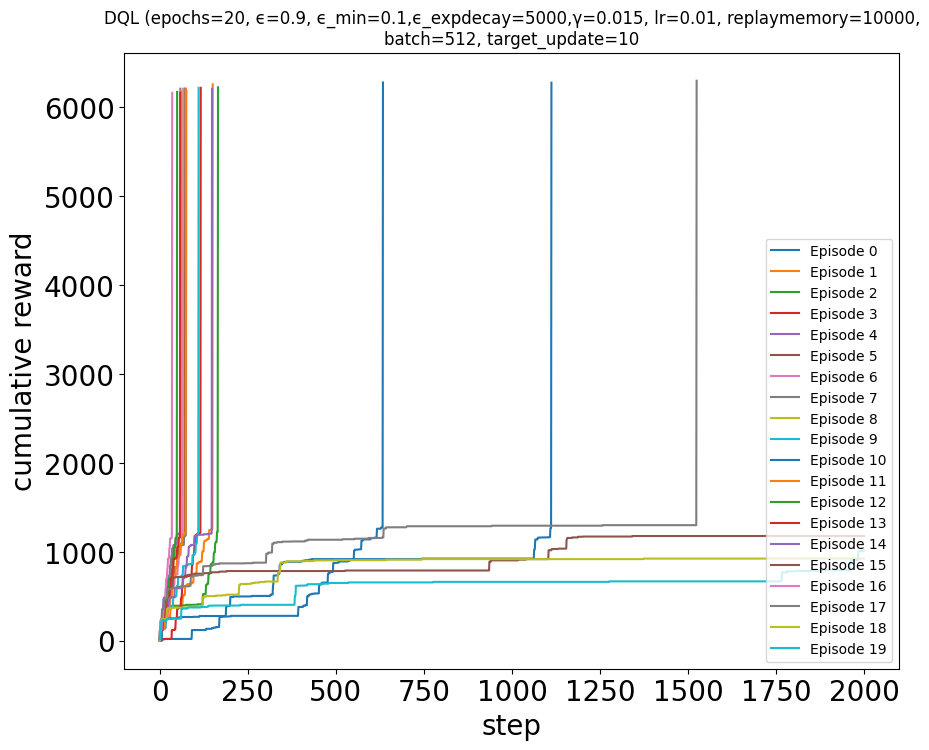

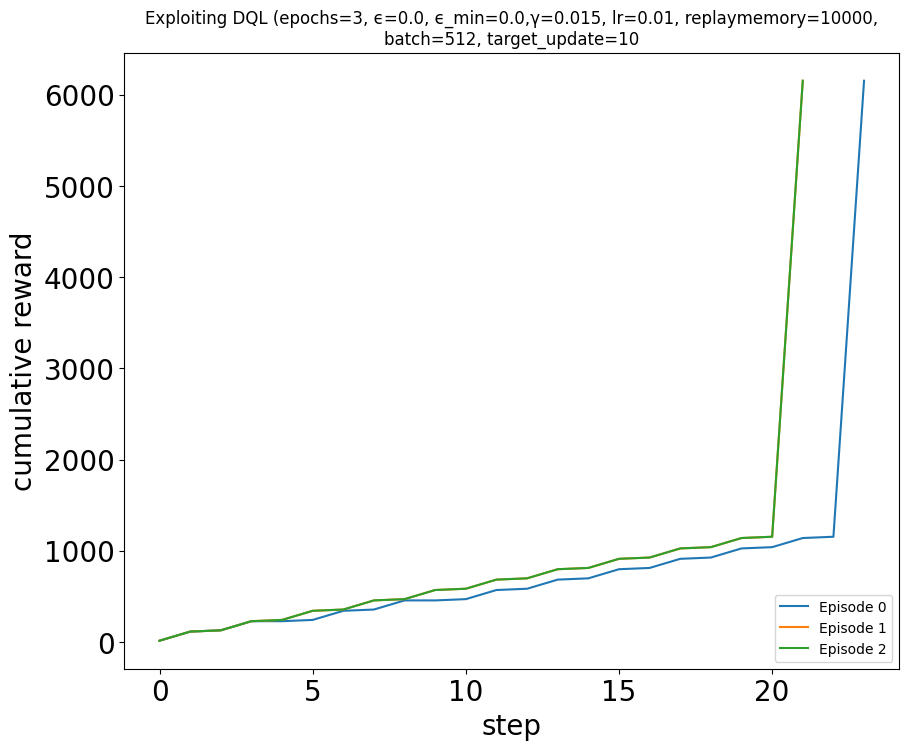

In [16]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)